# Fisher's Iris Data Set

The Data is already grouped in order of species.
Added field names to allow for column accessability.
Opened in Notepad++ and saved as CSV.

References:
   1. [Iris Data](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
   2. [Numpy Indexing/Slicing](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html)
   3. [Structured Array/Name Field](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.rec.html)

## 1. Get and load the data

In [2]:
#imports needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read iris data from file to iris numpy array
##give columns field names
iris = np.genfromtxt('C:\\users\\sgtcu\\Desktop\\IRIS2.csv',delimiter=',', dtype={'names':['sLength','sWidth','pLength','pWidth','species'
], 'formats':[None, None, None, None, 'S15']},  usecols=(0,1,2,3,4))

## 3. Create a simple plot

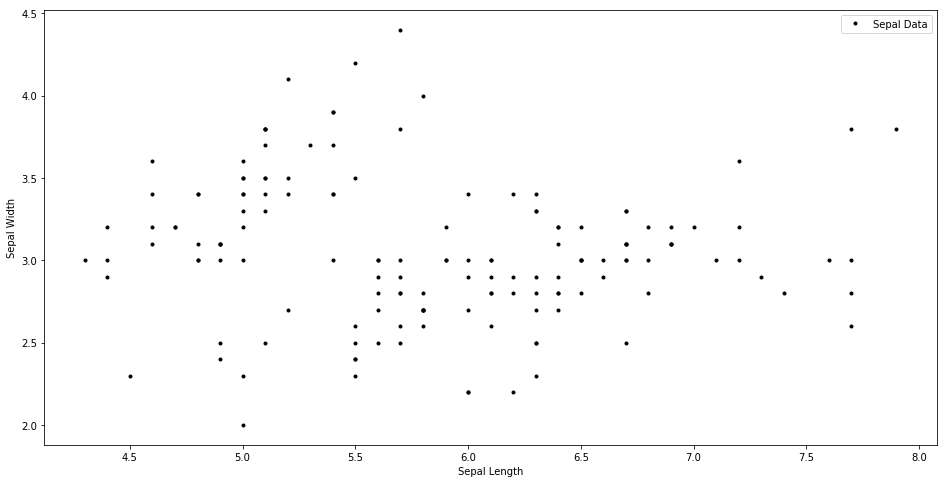

In [3]:
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (16.0, 8.0)

#Plot sepal length and width
plt.plot(iris['sLength'], iris['sWidth'], 'k. ', label="Sepal Data")

#labels x and y axis
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#shows legend
plt.legend()

#shows plot
plt.show()

## 4. Create a more complex plot
## 6. Fit a line

Best fit is m = 0.416419 and c = -0.366514


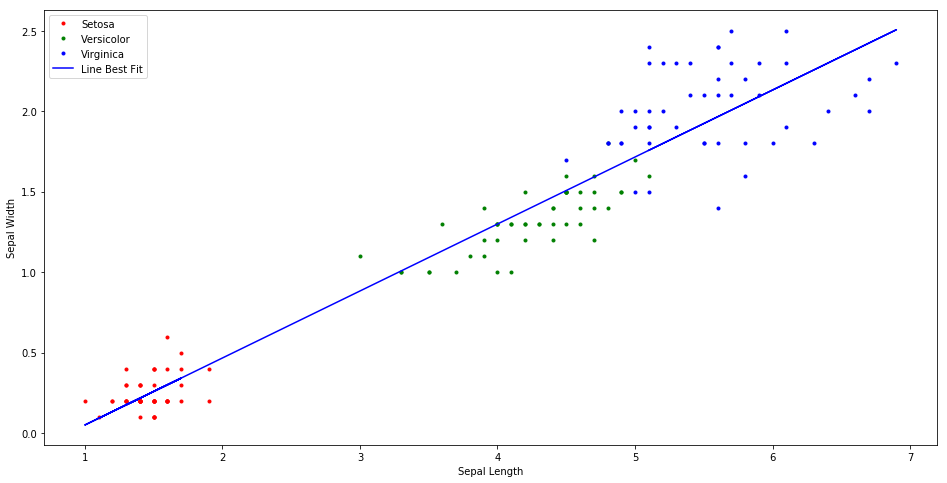

In [4]:
#Plot each species
plt.plot(iris['pLength'][:50], iris['pWidth'][:50], 'r. ', label="Setosa")
plt.plot(iris['pLength'][51:100], iris['pWidth'][51:100], 'g. ', label="Versicolor")
plt.plot(iris['pLength'][101:150], iris['pWidth'][101:150], 'b. ', label="Virginica")

#Line best fit calculations
m,c = np.polyfit(iris['pLength'], iris['pWidth'], 1)
print("Best fit is m = %f and c = %f" % (m, c))
plt.plot(iris['pLength'], m * iris['pLength'] + c, 'b-', label="Line Best Fit")

#label x and y axis
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#show legend
plt.legend()

#show plot
plt.show()

## 5. Use seaborn

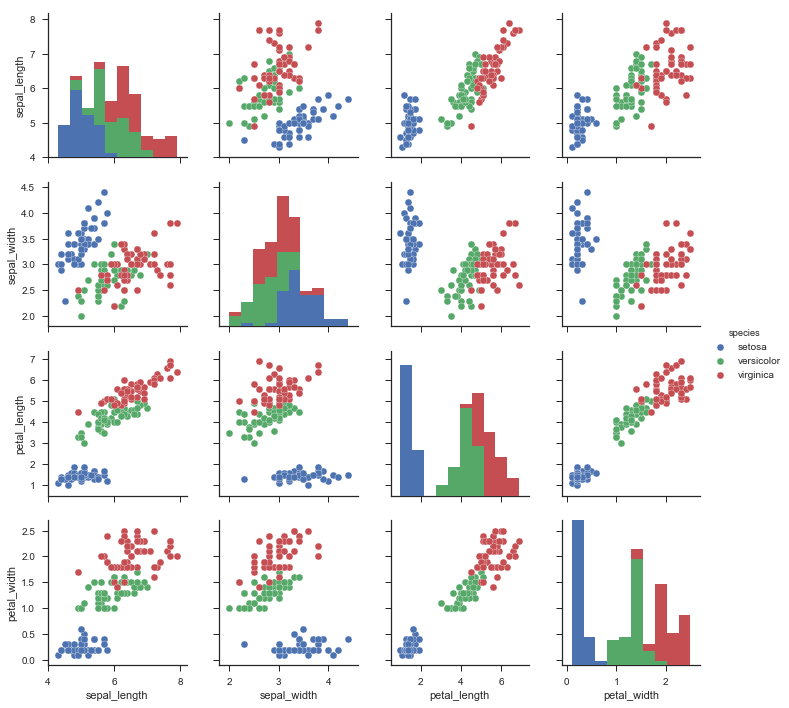

In [147]:
#using seaborn library, create scatterplot
#http://seaborn.pydata.org/examples/scatterplot_matrix.html

sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

plt.show()

## 7. Calculate the R-squared value

In [11]:
# Calculate the R-squared value for data set.
np.corrcoef(iris['pLength'], iris['pWidth'])[0][1]**2

0.9269012279220038

## 8. Fit another line

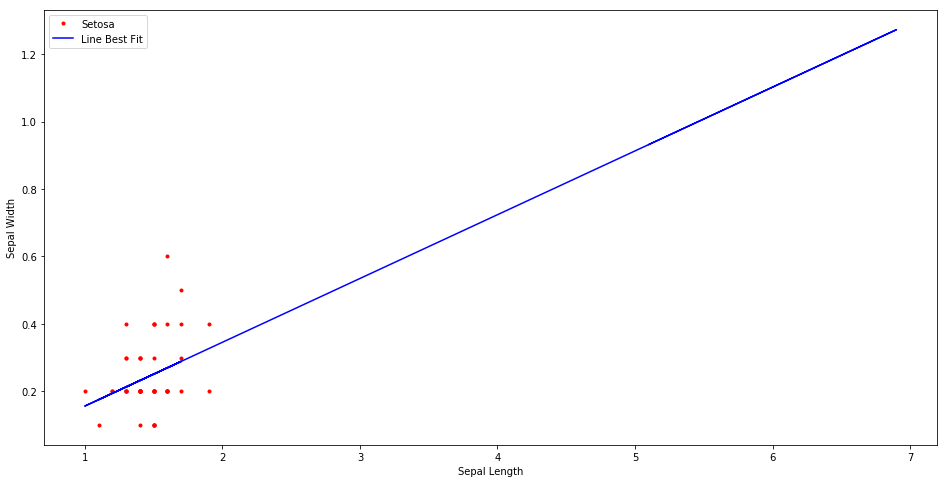

In [5]:
#plot just setosa petal width and length
plt.plot(iris['pLength'][:50], iris['pWidth'][:50], 'r. ', label="Setosa")

#Line best fit calcululations
m,c = np.polyfit(iris['pLength'][:50], iris['pWidth'][:50], 1)
plt.plot(iris['pLength'], m * iris['pLength'] + c, 'b-', label="Line Best Fit")

#label x and y axis
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#show legend
plt.legend()

#show plot
plt.show()

## 9. Calculate the R-squared value

In [6]:
#r squared for setosa petals
np.corrcoef(iris['pLength'][:50], iris['pWidth'][:50])[0][1]**2

0.09382472022283582

## 10. Use gradient descent

In [7]:
#defining function for m
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

#defining function for c
def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

#setting starter values
eta = 0.0001
m, c = 1.0, 1.0
change = True

#while loop which ends when m and c stop changing values, calibrating themselves each loop
while change:
  mnew = m - eta * grad_m(iris['sLength'][:50], iris['sWidth'][:50], m, c)
  cnew = c - eta * grad_c(iris['sLength'][:50], iris['sWidth'][:50], m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    #print("m: %20.16f  c: %20.16f" % (m, c))

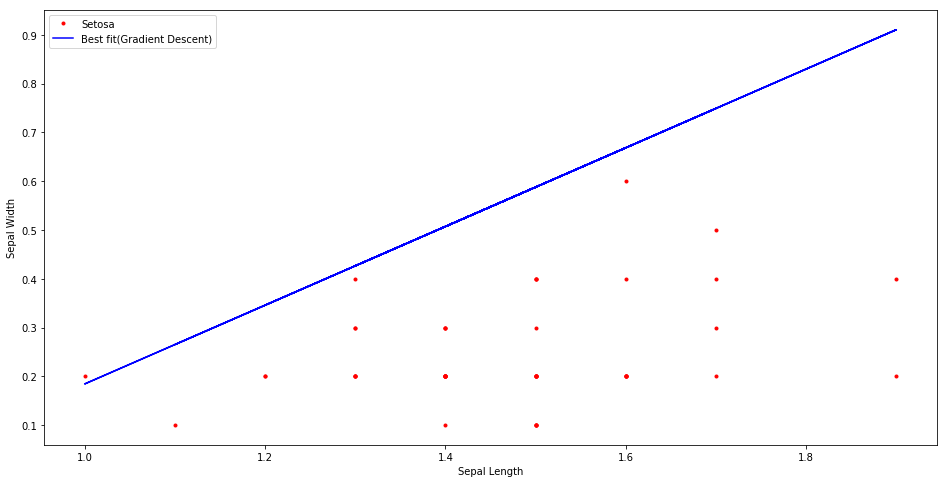

In [8]:
#plotting setosa petals
plt.plot(iris['pLength'][:50], iris['pWidth'][:50], 'r.', label="Setosa")

#plotting gradient descent for setosa petals
plt.plot(iris['pLength'][:50], m * iris['pLength'][:50] + c, 'b-', label = 'Best fit(Gradient Descent)')

#set label for x and y axis
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#show legend
plt.legend()

#show plot
plt.show()